In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [5]:
company = 'GWIND.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2024,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-06,18.760000,19.350000,17.840000,18.959999,18.959999,4654698
2023-03-07,19.030001,19.309999,19.010000,19.250000,19.250000,4445400
2023-03-08,19.290001,19.389999,18.940001,19.160000,19.160000,2991648
2023-03-09,19.170000,19.900000,19.170000,19.830000,19.830000,3696910
2023-03-10,19.830000,19.850000,18.840000,19.020000,19.020000,4707433
2023-03-13,19.000000,19.139999,18.600000,18.600000,18.600000,3530879
2023-03-14,18.620001,18.680000,18.020000,18.049999,18.049999,2872811
2023-03-15,18.049999,18.180000,17.299999,17.440001,17.440001,2874254
2023-03-16,17.440001,18.049999,17.440001,17.700001,17.700001,3314785


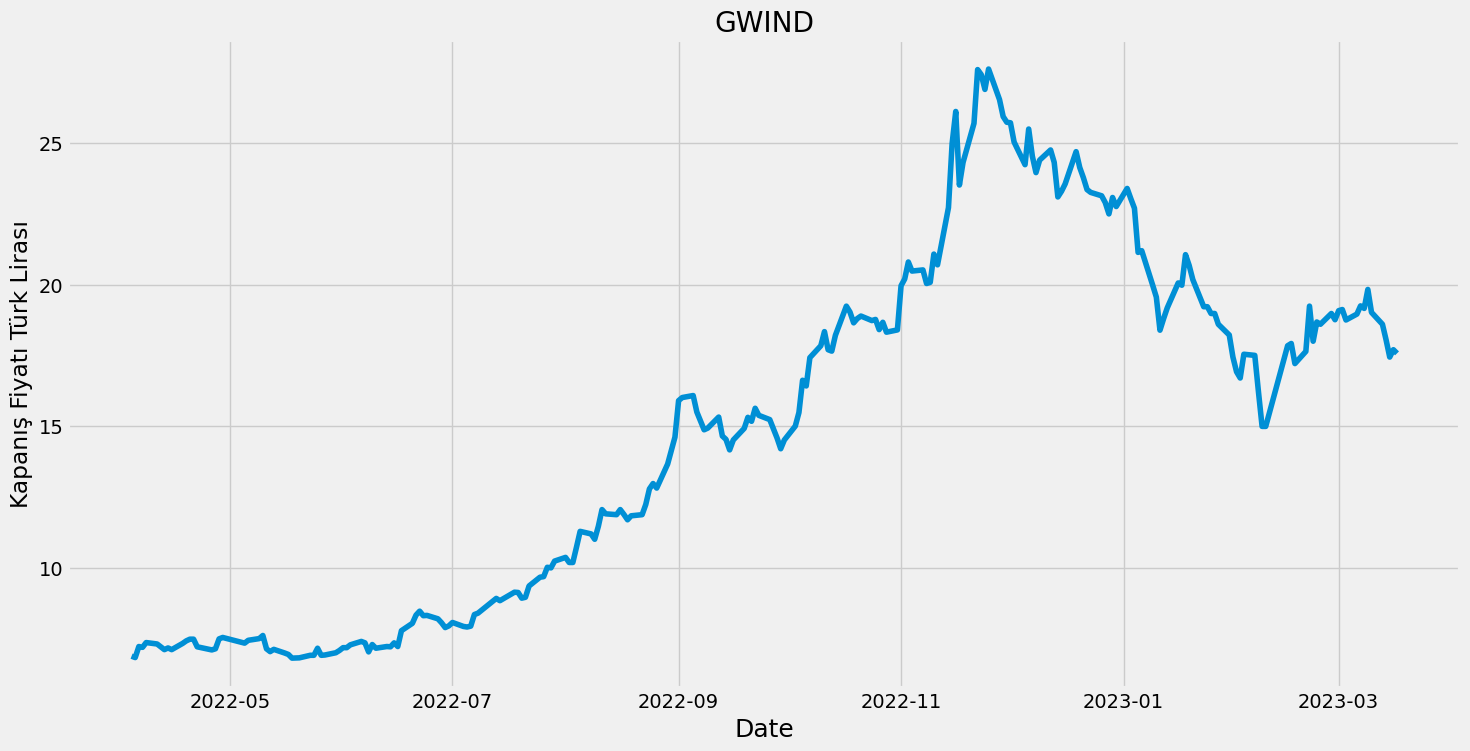

In [6]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("GWIND")
plt.show()

In [7]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

191


In [8]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.36213701e-03],
       [9.60613847e-04],
       [1.96925953e-02],
       [1.82516631e-02],
       [2.64168923e-02],
       [2.40153691e-02],
       [1.44092077e-02],
       [1.72910493e-02],
       [1.44092077e-02],
       [2.49759829e-02],
       [2.92987338e-02],
       [3.21805753e-02],
       [3.21805753e-02],
       [1.92122769e-02],
       [1.53698216e-02],
       [1.39289122e-02],
       [1.58501399e-02],
       [3.26608937e-02],
       [3.50624398e-02],
       [2.54562784e-02],
       [3.02593476e-02],
       [3.31411892e-02],
       [3.84245768e-02],
       [1.58501399e-02],
       [1.10470707e-02],
       [1.48895261e-02],
       [8.64552463e-03],
       [6.24397856e-03],
       [0.00000000e+00],
       [4.80295472e-04],
       [4.80306924e-03],
       [4.80306924e-03],
       [1.68107538e-02],
       [4.80306924e-03],
       [5.28336471e-03],
       [9.12582010e-03],
       [1.29682984e-02],
       [1.77713676e-02],
       [1.77713676e-02],
       [2.25744369e-02],


In [9]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00336214, 0.00096061, 0.0196926 , 0.01825166, 0.02641689,
       0.02401537, 0.01440921, 0.01729105, 0.01440921, 0.02497598,
       0.02929873, 0.03218058, 0.03218058, 0.01921228, 0.01536982,
       0.01392891, 0.01585014, 0.03266089, 0.03506244, 0.02545628,
       0.03025935, 0.03314119, 0.03842458, 0.01585014, 0.01104707,
       0.01488953, 0.00864552, 0.00624398, 0.        , 0.0004803 ,
       0.00480307, 0.00480307, 0.01681075, 0.00480307, 0.00528336,
       0.00912582, 0.0129683 , 0.01777137, 0.01777137, 0.02257444,
       0.02833812, 0.0259366 , 0.01056675, 0.02305476, 0.01681075,
       0.0196926 , 0.01921228, 0.0259366 , 0.0196926 , 0.04658981,
       0.05907779, 0.0730067 , 0.07973102, 0.07204611, 0.07252643,
       0.0667627 , 0.06003842, 0.05187319, 0.05475504, 0.06051874])]
[0.05379442126193462]



In [10]:
#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(131, 60, 1)

In [12]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Modeli derle
model.compile(optimizer="adam",loss="mean_squared_error")
#Modeli eğit
model.fit(x_train,y_train,batch_size=1, epochs=1)

131/131 [==============================] - 5s 14ms/step - loss: 0.0210


In [14]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 8ms/step


In [17]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

2.8493065935500126

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17640\2354484040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


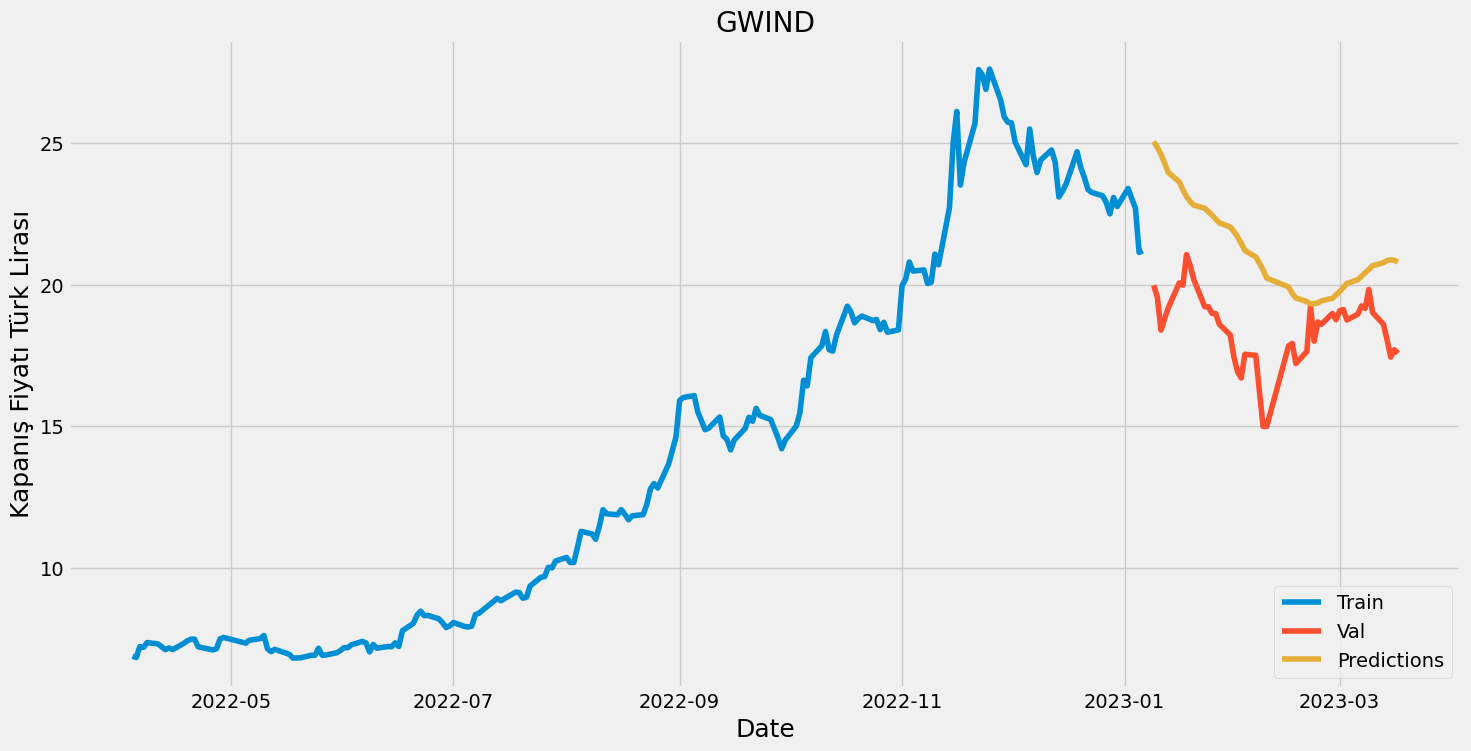

In [18]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("GWIND")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()